In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.preprocessing.image import ImageDataGenerator
%matplotlib inline


In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
train

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
X_train = train.drop('label',axis=1)
y_label = train['label']

Text(0.5, 1.0, 'Number of digit classes')

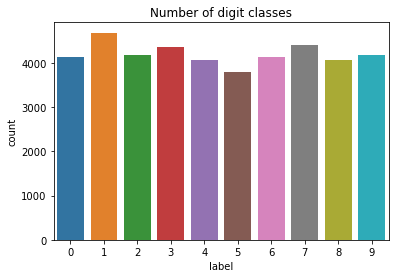

In [4]:
graph = sns.countplot(y_label)
plt.title("Number of digit classes")

In [5]:
X_train.shape

(42000, 784)

In [6]:
X_train = X_train.astype("float32") / 255.0

In [7]:
NUMBER_CLASSES = 10
y_label = keras.utils.to_categorical(y_label, NUMBER_CLASSES)
y_label

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [8]:
X_train = X_train.values.reshape(-1, 28, 28)
X_train.shape


(42000, 28, 28)

C:\anaconda\lib\site-packages\matplotlib\text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


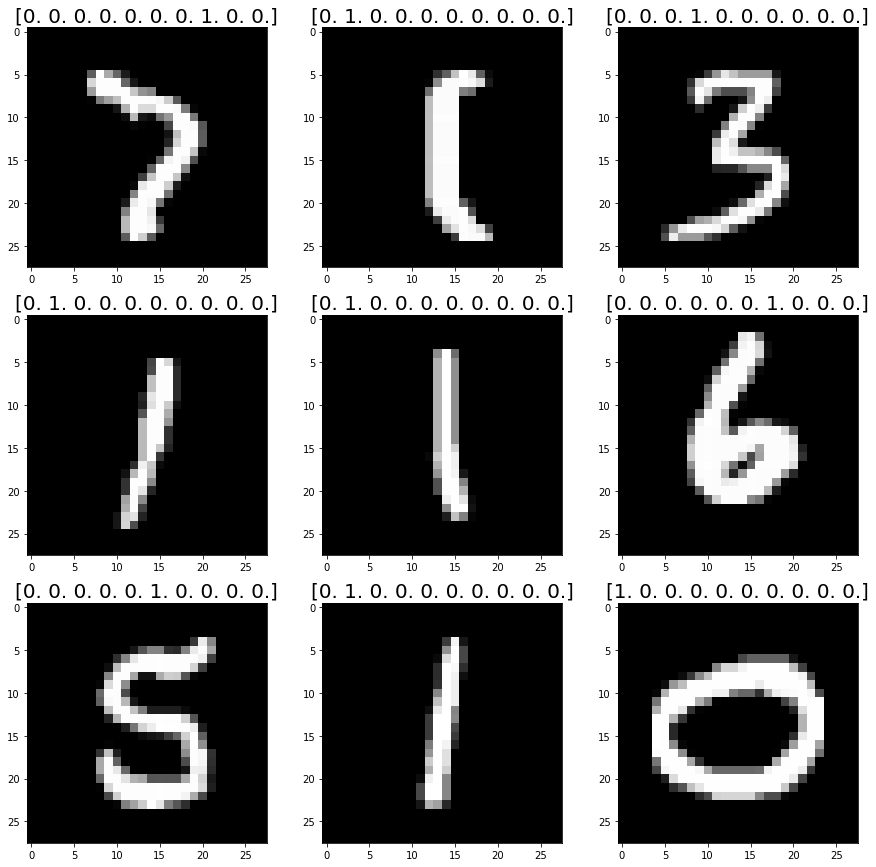

In [9]:
fig,ax =plt.subplots(3,3,figsize=(15,15))

for i in range(3):
    for j in range(3):
        s=np.random.randint(0,len(X_train))
        val = X_train[s,0:]
        img =val.reshape(28,28)
        ax[i][j].imshow(img, cmap="gray")
        ax[i][j].set_title(y_label[s],fontsize=20)

In [15]:
model = keras.Sequential(
    [
        keras.layers.Conv2D(32, kernel_size=(3, 3),input_shape=(28, 28,1), activation="relu"),
        keras.layers.BatchNormalization(),
        keras.layers.Conv2D(32, kernel_size=(3, 3),input_shape=(28, 28,1), activation="relu"),
        keras.layers.BatchNormalization(),
        keras.layers.Dropout(0.4),
        keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        keras.layers.BatchNormalization(),
        keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        keras.layers.BatchNormalization(),
        keras.layers.Flatten(),
        keras.layers.Dropout(0.4),
        keras.layers.Dense(64, activation="relu"),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(NUMBER_CLASSES, activation="softmax"),
    ]
)
optimizer = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999)

model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [16]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_13 (Batc (None, 26, 26, 32)        128       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
batch_normalization_14 (Batc (None, 24, 24, 32)        128       
_________________________________________________________________
dropout_4 (Dropout)          (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 22, 22, 64)        18496     
_________________________________________________________________
batch_normalization_15 (Batc (None, 22, 22, 64)       

In [17]:
X_train = X_train.reshape(-1,28,28,1)
X_train.shape


(42000, 28, 28, 1)

In [18]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(X_train,y_label, test_size=0.1, random_state=0)

In [19]:
datagen = ImageDataGenerator(
        rotation_range=5, 
        zoom_range = 0.1, 
        width_shift_range=0.1,  
        height_shift_range=0.1,  
        ) 

datagen.fit(x_train)

In [20]:
history = model.fit_generator(datagen.flow(x_train,y_train, batch_size=64),
                              epochs = 50, validation_data = (x_val,y_val), steps_per_epoch=x_train.shape[0] // 64)

C:\anaconda\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
590/590 [==============================] - 154s 259ms/step - loss: 0.8440 - accuracy: 0.7552 - val_loss: 0.1207 - val_accuracy: 0.9669
Epoch 2/50
590/590 [==============================] - 165s 279ms/step - loss: 0.2912 - accuracy: 0.9240 - val_loss: 0.1007 - val_accuracy: 0.9795
Epoch 3/50
590/590 [==============================] - 165s 280ms/step - loss: 0.1911 - accuracy: 0.9486 - val_loss: 0.0839 - val_accuracy: 0.9802
Epoch 4/50
590/590 [==============================] - 165s 279ms/step - loss: 0.1422 - accuracy: 0.9596 - val_loss: 0.0521 - val_accuracy: 0.9814
Epoch 5/50
590/590 [==============================] - 163s 276ms/step - loss: 0.1360 - accuracy: 0.9633 - val_loss: 0.0506 - val_accuracy: 0.9864
Epoch 6/50
590/590 [==============================] - 163s 276ms/step - loss: 0.1136 - accuracy: 0.9687 - val_loss: 0.0436 - val_accuracy: 0.9893
Epoch 7/50
590/590 [==============================] - 164s 278ms/step - loss: 0.0939 - accuracy: 0.9723 - val_loss: 0.0418 -

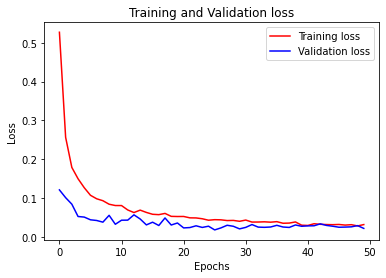

In [21]:
epochs = range(0,50)
plt.plot(epochs, history.history['loss'], 'r', label='Training loss')
plt.plot(epochs, history.history['val_loss'], 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

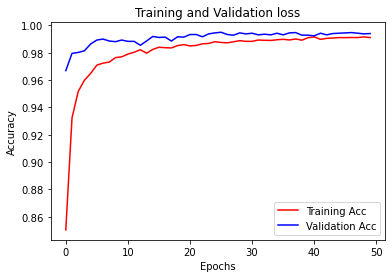

In [22]:
epochs = range(0,50)
plt.plot(epochs, history.history['accuracy'], 'r', label='Training Acc')
plt.plot(epochs, history.history['val_accuracy'], 'b', label='Validation Acc')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

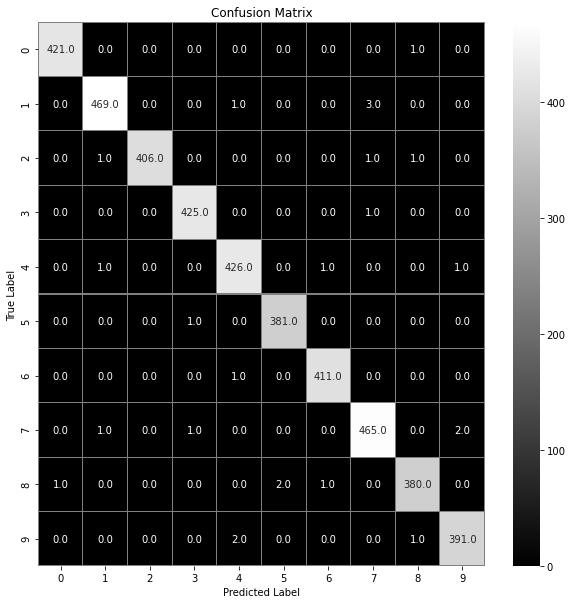

In [24]:
from sklearn.metrics import confusion_matrix

y_val_pred = model.predict(x_val)

y_pred_classes = np.argmax(y_val_pred,axis = 1) 

y_true = np.argmax(y_val,axis = 1) 

confusion_mtx = confusion_matrix(y_true, y_pred_classes) 

f,ax = plt.subplots(figsize=(10, 10))

sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="gray",linecolor="gray", fmt= '.1f')

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [25]:
test.shape

(28000, 784)

In [26]:
X_test = test.values.reshape(-1,28,28,1)
X_test.shape

(28000, 28, 28, 1)

In [27]:
X_test = X_test.astype("float32") / 255.0

In [28]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

2


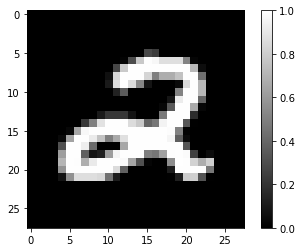

In [29]:
print(y_pred[27999])
X_test=X_test.reshape(-1,28,28)
plt.figure()
plt.imshow(X_test[27999], cmap='gray')
plt.colorbar()
plt.show()

In [30]:
pred_df = pd.DataFrame(y_pred)
pred_df

,0
0,2
1,0
2,9
3,0
4,3
...,...
27995,9
27996,7
27997,3
27998,9


In [31]:
pred_df.index += 1 
pred_df = pred_df.reset_index()
pred_df.columns = ["ImageId", "Label"]
pred_df

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [32]:
pred_df.to_csv("my_submission2.csv", index=False)

In [33]:
model.save('digit-recognizer.h5')